# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity'] 
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed'] 
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taihecun
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | mora
Processing Record 8 of Set 1 | takehara
Processing Record 9 of Set 1 | hami
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | carutapera
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | wad medani
Processing Record 14 of Set 1 | alesund
Processing Record 15 of Set 1 | al bardiyah
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | tsiombe
Processing Record 21 of Set 1 | badger
Processing Record 22 of

Processing Record 40 of Set 4 | modimolle
Processing Record 41 of Set 4 | palmerston north
Processing Record 42 of Set 4 | black river
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | vadso
Processing Record 45 of Set 4 | kadipur
Processing Record 46 of Set 4 | elliot lake
Processing Record 47 of Set 4 | walvis bay
Processing Record 48 of Set 4 | tabas
Processing Record 49 of Set 4 | isafjordur
Processing Record 0 of Set 5 | vilyuchinsk
Processing Record 1 of Set 5 | vorgashor
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | enewetak
Processing Record 4 of Set 5 | stephenville
Processing Record 5 of Set 5 | tazacorte
Processing Record 6 of Set 5 | san sebastian de la gomera
Processing Record 7 of Set 5 | la romana
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | yugorsk
Processing Record 10 of Set 5 | west plains
Processing Record 11 of Set 5 | ocean shores
Processing Record 12 of Set 5 | uturoa
Processing Record 1

Processing Record 33 of Set 8 | afogados da ingazeira
Processing Record 34 of Set 8 | baykalovo
Processing Record 35 of Set 8 | berdigestyakh
Processing Record 36 of Set 8 | itoman
Processing Record 37 of Set 8 | sejenane
Processing Record 38 of Set 8 | vanimo
Processing Record 39 of Set 8 | anloga
Processing Record 40 of Set 8 | portland
Processing Record 41 of Set 8 | cat ba
City not found. Skipping...
Processing Record 42 of Set 8 | kolonia town
Processing Record 43 of Set 8 | muravlenko
Processing Record 44 of Set 8 | post
Processing Record 45 of Set 8 | kapuskasing
Processing Record 46 of Set 8 | fort st. john
Processing Record 47 of Set 8 | vypasne
Processing Record 48 of Set 8 | idabel
Processing Record 49 of Set 8 | port alfred
Processing Record 0 of Set 9 | grand falls-windsor
Processing Record 1 of Set 9 | qamdo
Processing Record 2 of Set 9 | sikasso
Processing Record 3 of Set 9 | aykhal
Processing Record 4 of Set 9 | torghay
Processing Record 5 of Set 9 | tamandare
Processin

Processing Record 25 of Set 12 | mayna
Processing Record 26 of Set 12 | nuku'alofa
Processing Record 27 of Set 12 | harper
Processing Record 28 of Set 12 | praia
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | klaksvik
Processing Record 31 of Set 12 | sauri
Processing Record 32 of Set 12 | whakatane
Processing Record 33 of Set 12 | magdagachi
Processing Record 34 of Set 12 | cannonvale
Processing Record 35 of Set 12 | lisala
Processing Record 36 of Set 12 | moyale
Processing Record 37 of Set 12 | pimentel
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taihecun,45.8000,130.8500,72.75,20,100,10.02,CN,1683862658
1,bethel,41.3712,-73.4140,62.47,72,0,3.44,US,1683862616
2,puerto ayora,-0.7393,-90.3518,79.56,96,44,7.00,EC,1683862477
3,thompson,55.7435,-97.8558,51.96,62,20,8.05,CA,1683862616
4,college,64.8569,-147.8028,62.92,47,75,8.05,US,1683862620


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taihecun,45.8000,130.8500,72.75,20,100,10.02,CN,1683862658
1,bethel,41.3712,-73.4140,62.47,72,0,3.44,US,1683862616
2,puerto ayora,-0.7393,-90.3518,79.56,96,44,7.00,EC,1683862477
3,thompson,55.7435,-97.8558,51.96,62,20,8.05,CA,1683862616
4,college,64.8569,-147.8028,62.92,47,75,8.05,US,1683862620


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

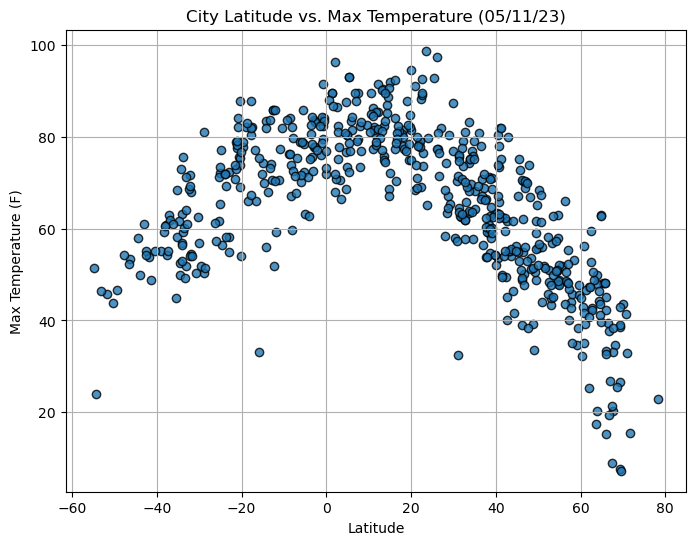

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

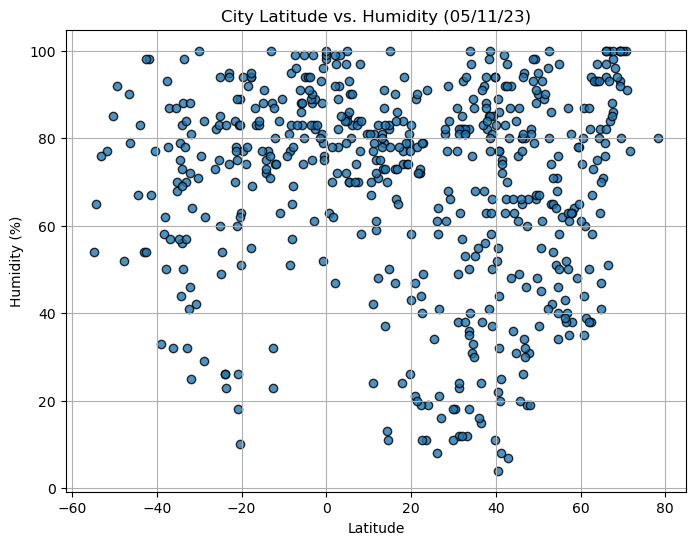

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

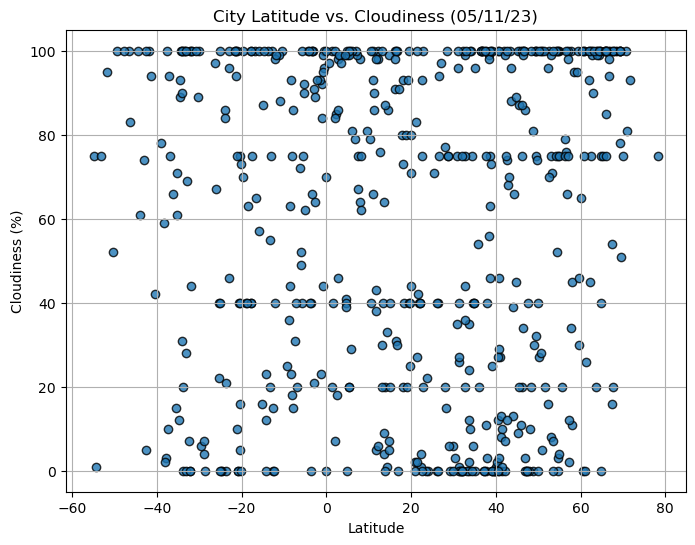

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

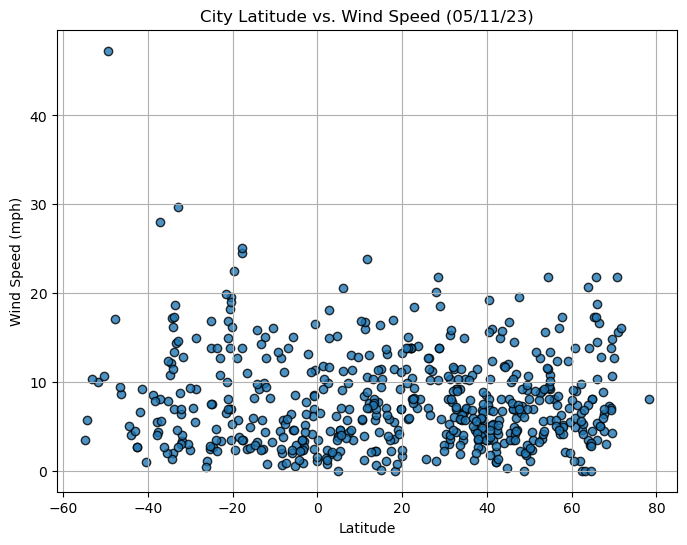

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, 
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def create_linreg_plots(x_values, y_values, y_label, title, fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
    plt.plot(x_values, regress_values, "r-")
    
    plt.title(title + " (%s)" % time.strftime("%x"))
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid(True)
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")

    plt.savefig("output_data/" + fig_name + ".png")

    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taihecun,45.8000,130.8500,72.75,20,100,10.02,CN,1683862658
1,bethel,41.3712,-73.4140,62.47,72,0,3.44,US,1683862616
3,thompson,55.7435,-97.8558,51.96,62,20,8.05,CA,1683862616
4,college,64.8569,-147.8028,62.92,47,75,8.05,US,1683862620
5,mora,11.0461,14.1401,86.31,24,66,1.21,CM,1683862658


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,79.56,96,44,7.00,EC,1683862477
8,carutapera,-1.1950,-46.0200,76.15,93,23,4.09,BR,1683862635
13,adamstown,-25.0660,-130.1015,72.10,60,100,16.91,PN,1683862616
14,ushuaia,-54.8000,-68.3000,51.46,54,75,3.44,AR,1683862326
16,invercargill,-46.4000,168.3500,53.35,79,83,8.68,NZ,1683862616


###  Temperature vs. Latitude Linear Regression Plot

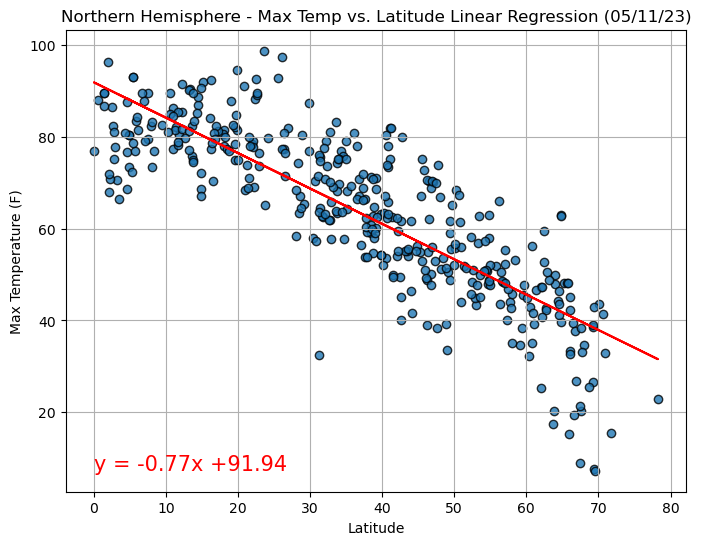

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

create_linreg_plots(x_values, y_values, "Max Temperature (F)", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", "NorthHemi_Temp_vs_Lat")

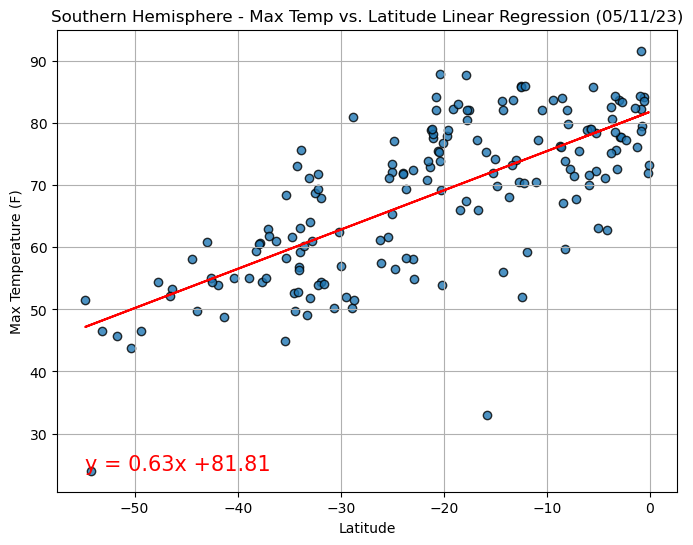

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

create_linreg_plots(x_values, y_values, "Max Temperature (F)", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", "SouthHemi_Temp_vs_Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

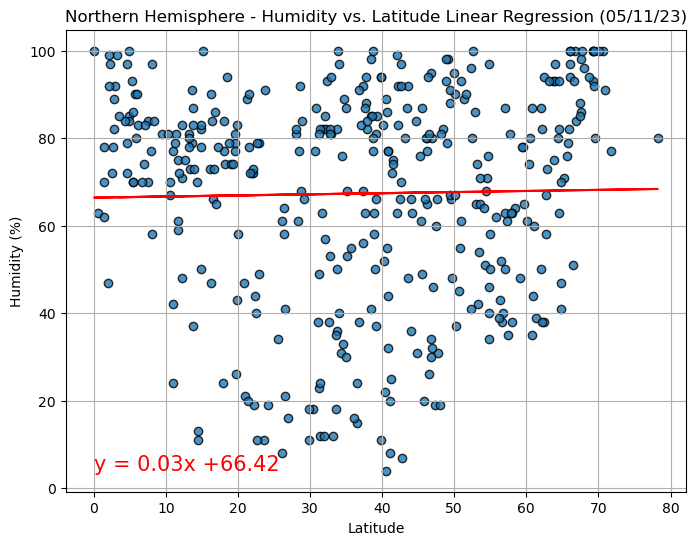

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

create_linreg_plots(x_values, y_values, "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", "NorthHemi_Humidity_vs_Lat")

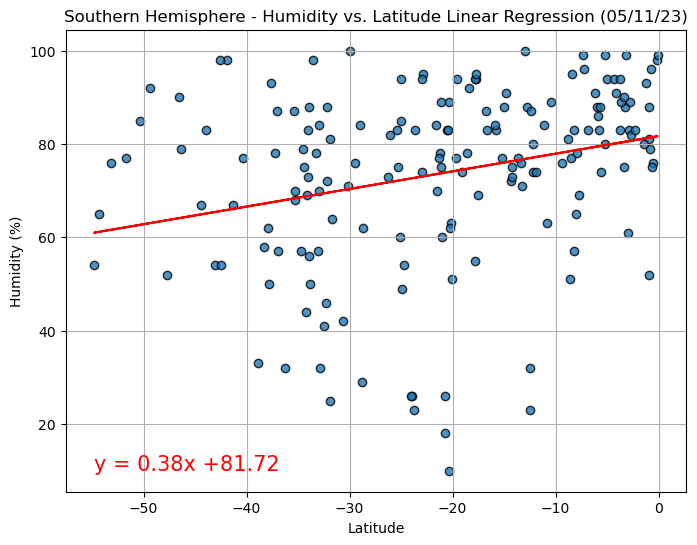

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

create_linreg_plots(x_values, y_values, "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", "SouthHemi_Humidity_vs_Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

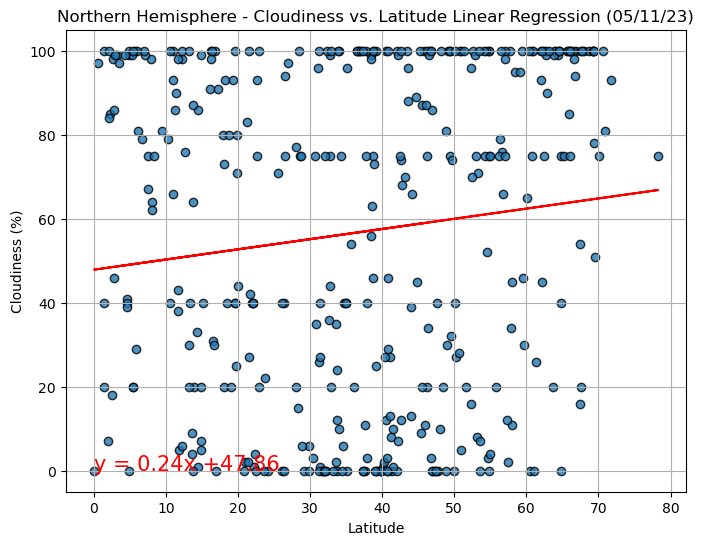

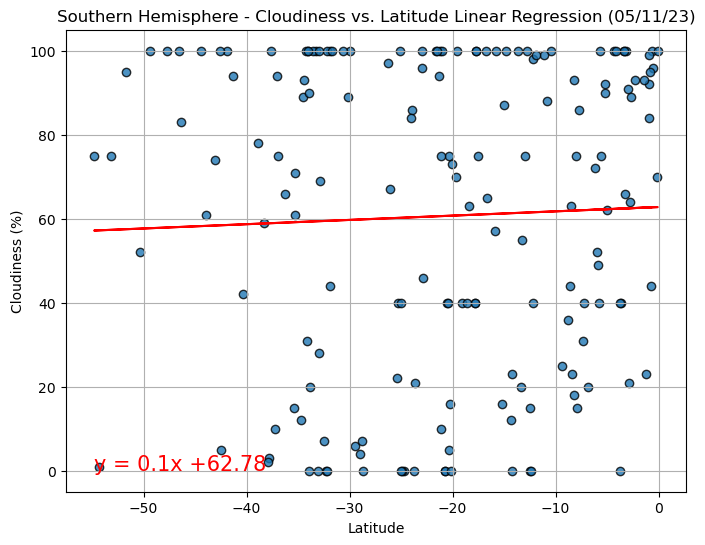

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

create_linreg_plots(x_values, y_values, "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", "NorthHemi_Cloudiness_vs_Lat")

# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

create_linreg_plots(x_values, y_values, "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", "SouthHemi_Cloudiness_vs_Lat")

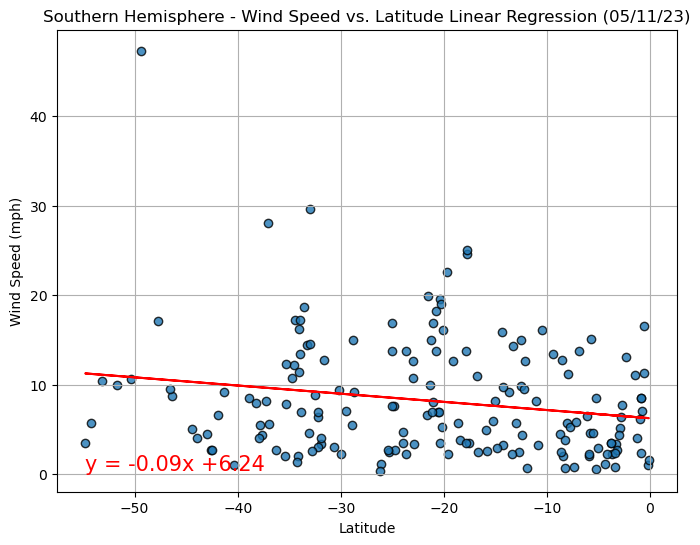

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

create_linreg_plots(x_values, y_values, "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", "SouthHemi_WindSpeed_vs_Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

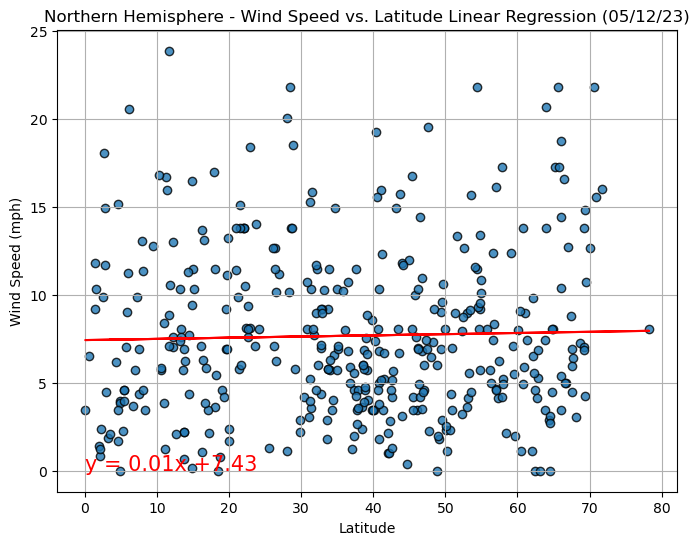

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

create_linreg_plots(x_values, y_values, "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", "NorthHemi_WindSpeed_vs_Lat")

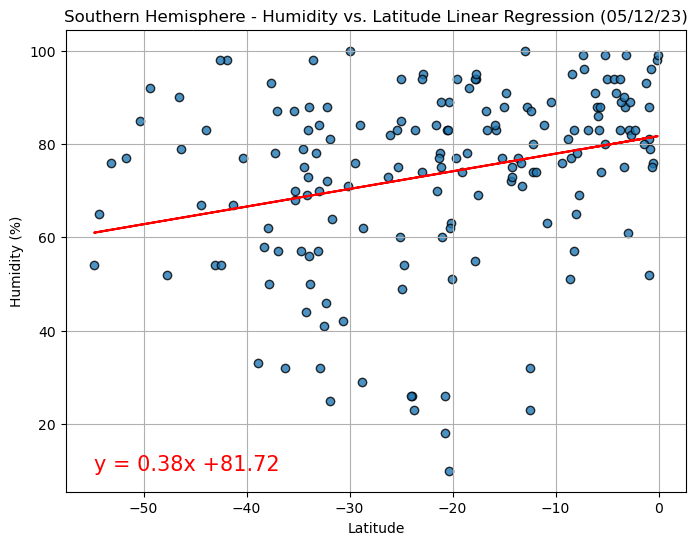

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

create_linreg_plots(x_values, y_values, "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", "SouthHemi_Humidity_vs_Lat")

**Discussion about the linear relationship:** YOUR RESPONSE HERE